## To explore Unsupervised Machine Learning

### K.Means Clustering

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# to see whole dataset
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [5]:
# read dataset
data=pd.read_csv('Iris.csv')
print('Data has been loaded...')

Data has been loaded...


In [6]:
df=data.copy()   # creating a copy of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Since, Id column has no significance in our model building, hence, we can drop that column

In [7]:
df.drop(['Id'], axis=1, inplace=True)

### Analysing data

In [65]:
sns.set_style('darkgrid')

In [14]:
x=df.drop(['Species'], axis=1)

In [15]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
X=np.array(x)

In [66]:
y=df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

Finding the value of k (number of clusters) using 'ELBOW METHOD'

In [30]:
list=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    predict_i=kmeans.inertia_
    list.append(predict_i)

#### Finding value of K using Elbow method

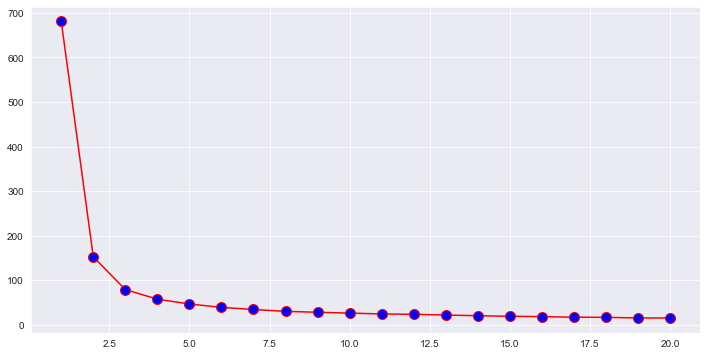

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21), list, color='red', marker='o', markerfacecolor='blue', markersize=10)

From above plot it is visible that our elbow point is 3 hence, number of clusters are 2

In [34]:
kmeans_new=KMeans(n_clusters=3)

In [35]:
y_predict=kmeans_new.fit_predict(x)

In [39]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

##### Visualization of clusters

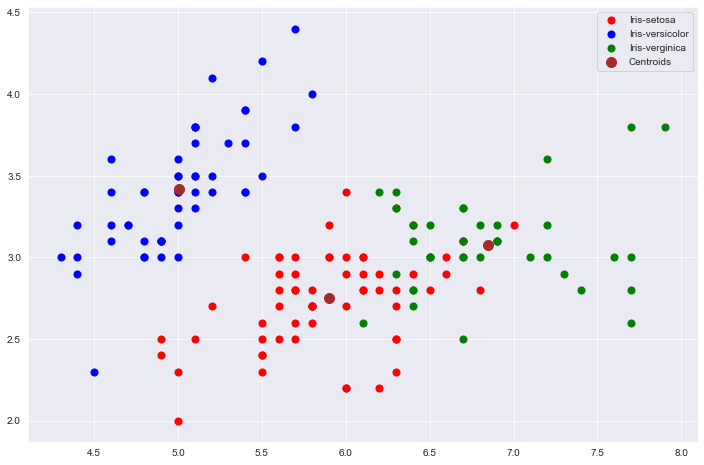

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_predict == 0,0], X[y_predict== 0,1], c='red', s=50, label='Iris-setosa')
plt.scatter(X[y_predict == 1,0], X[y_predict== 1,1], c='blue', s=50, label='Iris-versicolor')
plt.scatter(X[y_predict == 2,0], X[y_predict== 2,1], c='green', s=50, label='Iris-verginica')
plt.scatter(kmeans_new.cluster_centers_[:,0], kmeans_new.cluster_centers_[:,1], c='brown', s=100, label='Centroids')
plt.legend()